# Exercise 2: Inflow-driven model

In this exercise, we want to write a function that reads a vector of time (list of years) and an inflow vector and calculate the outflows and stock.
We assume a fixed lifetime of 4 years.


## Modelling 

We start by importing the pandas package:

In [1]:
import pandas as pd

In [5]:
# Extracting data from the source file into a panda Dataframe
file = "Warm_up_data.csv"
# This file is fetched from the shared directory (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_csv function from the pandas package
data = pd.read_csv(file,header=0 , sep=',')
print(data)

# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We keep only the historic data up to 2008, where there is inflow data
data = data[data.Time < 2009]

# We store the time and inflows values in two lists
time = data['Time'].tolist()
inflows = data['Inflow'].tolist()

     Time  Population        Inflow  Outflow  Stock Change  Stock  \
0    1950    544951.0   1157.864047      NaN           NaN    NaN   
1    1951    555606.0   3085.651022      NaN           NaN    NaN   
2    1952    566261.0   1314.644583      NaN           NaN    NaN   
3    1953    576916.0   4843.545514      NaN           NaN    NaN   
4    1954    587571.0   3575.745174      NaN           NaN    NaN   
5    1955    598226.0   2610.542397      NaN           NaN    NaN   
6    1956    607766.2   6049.388165      NaN           NaN    NaN   
7    1957    617306.4   3197.065801      NaN           NaN    NaN   
8    1958    626846.6   5753.977063      NaN           NaN    NaN   
9    1959    636386.8   6526.578667      NaN           NaN    NaN   
10   1960    645927.0    719.272301      NaN           NaN    NaN   
11   1961    659995.6   3132.875888      NaN           NaN    NaN   
12   1962    674064.2   3674.182644      NaN           NaN    NaN   
13   1963    688132.8   3544.52597

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
# We check the time data
print(time)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


Write a function that takes the inflows (a list) and lifetime (an integer) as argument and returns a list of outflows

In [8]:
def outflows_inflow_driven (inflows:list, lifetime:int):
    # we use this syntax to indicate that the arguments of the functions have to be a list and an integer
    outflows = []
    for i in range(len(inflows)):
        if i >= lifetime:
            outflows.append(inflows[i - lifetime])
        else:
            outflows.append(0)
    
    return outflows

Test the function:

In [9]:
lifetime = 4
outflows  = outflows_inflow_driven (inflows=inflows, lifetime=lifetime)
print(outflows)

[0, 0, 0, 0, 1157.864047, 3085.651022, 1314.644583, 4843.545514, 3575.745174, 2610.5423969999997, 6049.388165, 3197.065801, 5753.977063, 6526.578667, 719.2723009, 3132.875888, 3674.182644, 3544.525976, 6042.928801, 9367.235464, 6212.29886, 4266.59473, 4419.973554, 4863.323093999999, 10789.10402, 12197.10599, 20288.0069, 23373.990319999997, 27567.94971, 34790.1283, 34766.9415, 28423.88177, 38188.441719999995, 44003.48269, 61008.02176, 62951.928120000004, 45471.83911, 46989.5658, 97929.70245, 246926.4207, 189560.0339, 169567.0292, 213787.8421, 189120.2529, 190843.2527, 269124.6856, 454130.659, 650893.6825, 699527.9112, 754783.1479, 787853.6607, 1046749.3420000001, 845216.7179, 997514.9398, 1304599.044, 1602565.015, 2320646.128, 3043941.7989999996, 2901349.637]


Write a function that calculate the stock change from inflows and outflows:

In [10]:
# We can also use the  subtract function from the numpy package
import numpy as np
def stock_change_inflow_driven (inflows:list, outflows:list):
    return np.subtract(inflows, outflows)

Test the function:

In [11]:
stock_change = stock_change_inflow_driven (inflows=inflows, outflows=outflows)
print(stock_change)

[ 1.15786405e+03  3.08565102e+03  1.31464458e+03  4.84354551e+03
  2.41788113e+03 -4.75108625e+02  4.73474358e+03 -1.64647971e+03
  2.17823189e+03  3.91603627e+03 -5.33011586e+03 -6.41899130e+01
 -2.07979442e+03 -2.98205269e+03  5.32365650e+03  6.23435958e+03
  2.53811622e+03  7.22068754e+02 -1.62295525e+03 -4.50391237e+03
  4.57680516e+03  7.93051126e+03  1.58680333e+04  1.85106672e+04
  1.67788457e+04  2.25930223e+04  1.44789346e+04  5.04989145e+03
  1.06204920e+04  9.21335439e+03  2.62410803e+04  3.45280464e+04
  7.28339739e+03  2.98608311e+03  3.69216807e+04  1.83974493e+05
  1.44088195e+05  1.22577463e+05  1.15858140e+05 -5.78061678e+04
  1.28321880e+03  9.95576564e+04  2.40342817e+05  4.61773430e+05
  5.08684658e+05  4.85658462e+05  3.33723002e+05  3.95855660e+05
  1.45688807e+05  2.42731792e+05  5.16745383e+05  5.55815673e+05
  1.47542941e+06  2.04642686e+06  1.59675059e+06  2.75265717e+06
  3.01008772e+06  3.26193767e+06  4.16617100e+06]


Write a function that calculate the stock from the stock change:

In [12]:
def stock_inflow_driven (stock_change:list):
    # We need to define the initial stock:
    stock = [0]
    # And then we calculate the stock iteratively 
    # using the previous values of the stock and the stock change
    for i in range(1, len(stock_change)):
        stock.append(stock[i-1] + stock_change[i-1])
    return stock

Test the function:

In [13]:
stock = stock_inflow_driven (stock_change=stock_change)
print(stock)

[0, 1157.864047, 4243.515069, 5558.159652, 10401.705166, 12819.586293, 12344.477668, 17079.22125, 15432.741536999998, 17610.973425999997, 21527.009695999997, 16196.893831899997, 16132.703918899997, 14052.909499899997, 11070.856808899996, 16394.513308999994, 22628.872884999993, 25166.989100999992, 25889.057854999992, 24266.102607999994, 19762.190237999996, 24338.995397999995, 32269.506657999995, 48137.540003999995, 66648.20723, 83427.05292, 106020.07523, 120499.00983, 125548.90127999999, 136169.39328999998, 145382.74767999997, 171623.82794, 206151.87429, 213435.27168, 216421.35479, 253343.03548000002, 437317.52806000004, 581405.72285, 703983.18625, 819841.3259, 762035.1581000001, 763318.3769000001, 862876.0333000002, 1103218.8502000002, 1564992.2798000001, 2073676.9383, 2559335.4006, 2893058.4022999997, 3288914.0618, 3434602.8685, 3677334.6604, 4194080.0437, 4749895.7167, 6225325.1268, 8271751.986, 9868502.579, 12621159.752999999, 15631247.468999999, 18893185.134]


Finally, write a code that calculates outflows, stock change and stock for historic data from the inflow and lifetime, using the functions above.

In [14]:
# We calculate the outflows from the inflows
outflows = outflows_inflow_driven(inflows=inflows, lifetime=lifetime)
#
stock_change = stock_change_inflow_driven(inflows=inflows, outflows=outflows)
stock = stock_inflow_driven(stock_change=stock_change)

## Plot the results

To plot the results, we are going to use the module pyplot from the package matplotlib. It is similar to the way MATLAB generates plots.

You can check the official tutorial here: https://matplotlib.org/users/pyplot_tutorial.html

In [15]:
import matplotlib.pyplot as plt

<Figure size 936x720 with 0 Axes>

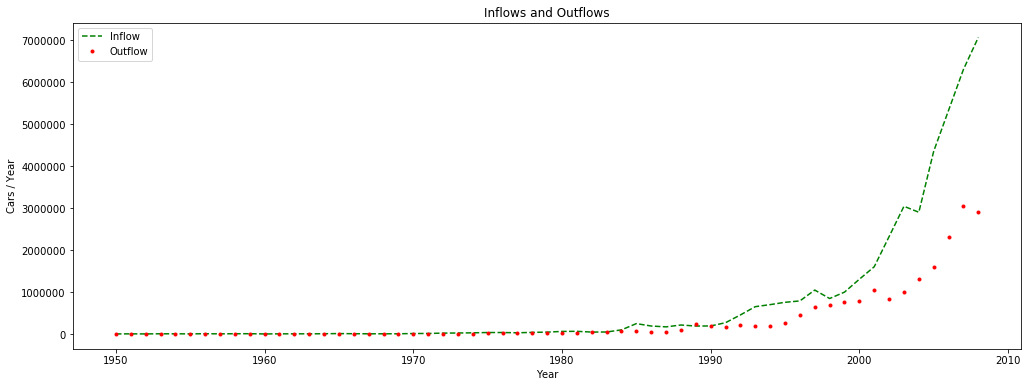

In [16]:
# Plot the results
fig = plt.figure(figsize=(13, 10))

# Inflows and Outflows
plt.figure(figsize=(17, 6))
plt.plot(time, inflows, 'g--', label='Inflow')
plt.plot(time, outflows,'r.', label='Outflow')
plt.title('Inflows and Outflows')
plt.xlabel('Year')
plt.ylabel('Cars / Year')
plt.legend(loc='best')


Plot also the stock and stock change:

In [17]:
# Plot the stock and stock change

## Normally distributed lifetime 

If we want to use a normally distributed lifetime instead, we can use the predefined function in the package scipy:

In [18]:
from scipy.stats import norm

We can then use this syntax to calculate the cumulative distribution function of the normal distribution at point x:

norm(lifetime, st_dev).cdf(x).

Here are some examples for a lifetime of 15 years and a standard deviation of 5 years.

In [19]:
from scipy.stats import norm
import numpy as np
s=0
# 3 st_dev below mean
print('3 st_dev below mean:', norm(15, 5).cdf(0))

# 1 st_dev below mean
print('1 st_dev below mean:', norm(15, 5).cdf(10))

# at mean
print('at mean:', norm(15, 5).cdf(15))

# 3 st_dev above mean
print('3 st_dev above mean:', norm(15, 5).cdf(30))

3 st_dev below mean: 0.0013498980316300933
1 st_dev below mean: 0.15865525393145707
at mean: 0.5
3 st_dev above mean: 0.9986501019683699


We can plot the cumulative distribution function:

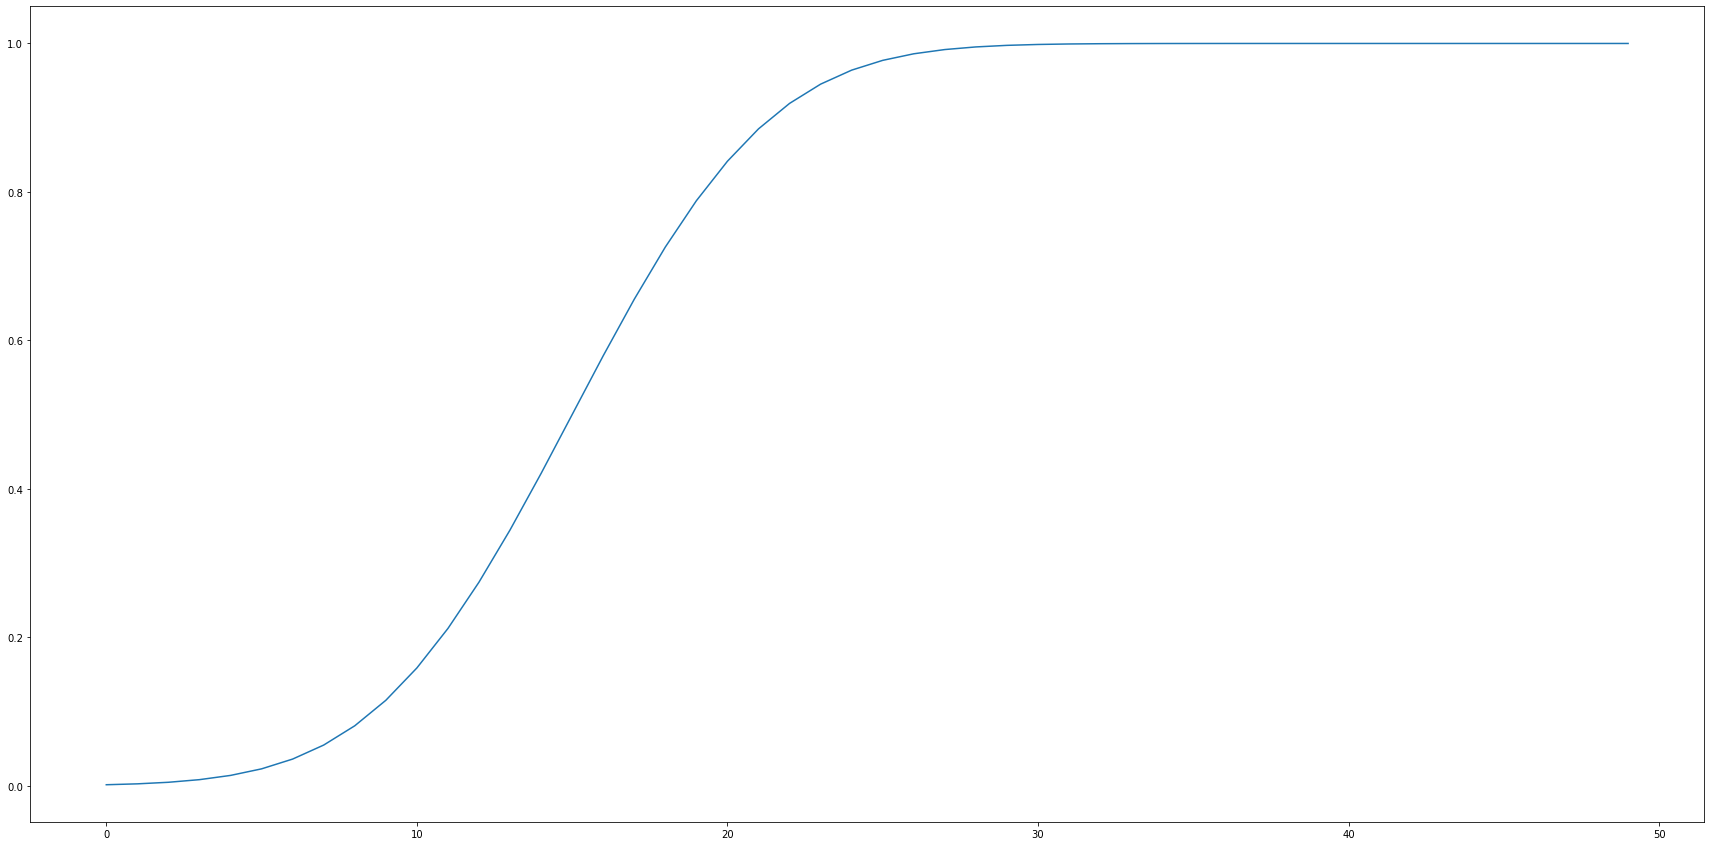

In [20]:
from scipy.stats import norm
import numpy as np
a = [norm(15, 5).cdf(i) for i in range(50)]

fig = plt.figure(figsize=(30, 15))
plt.plot(a)
plt.show()

We can get the probability distribution function by difference:

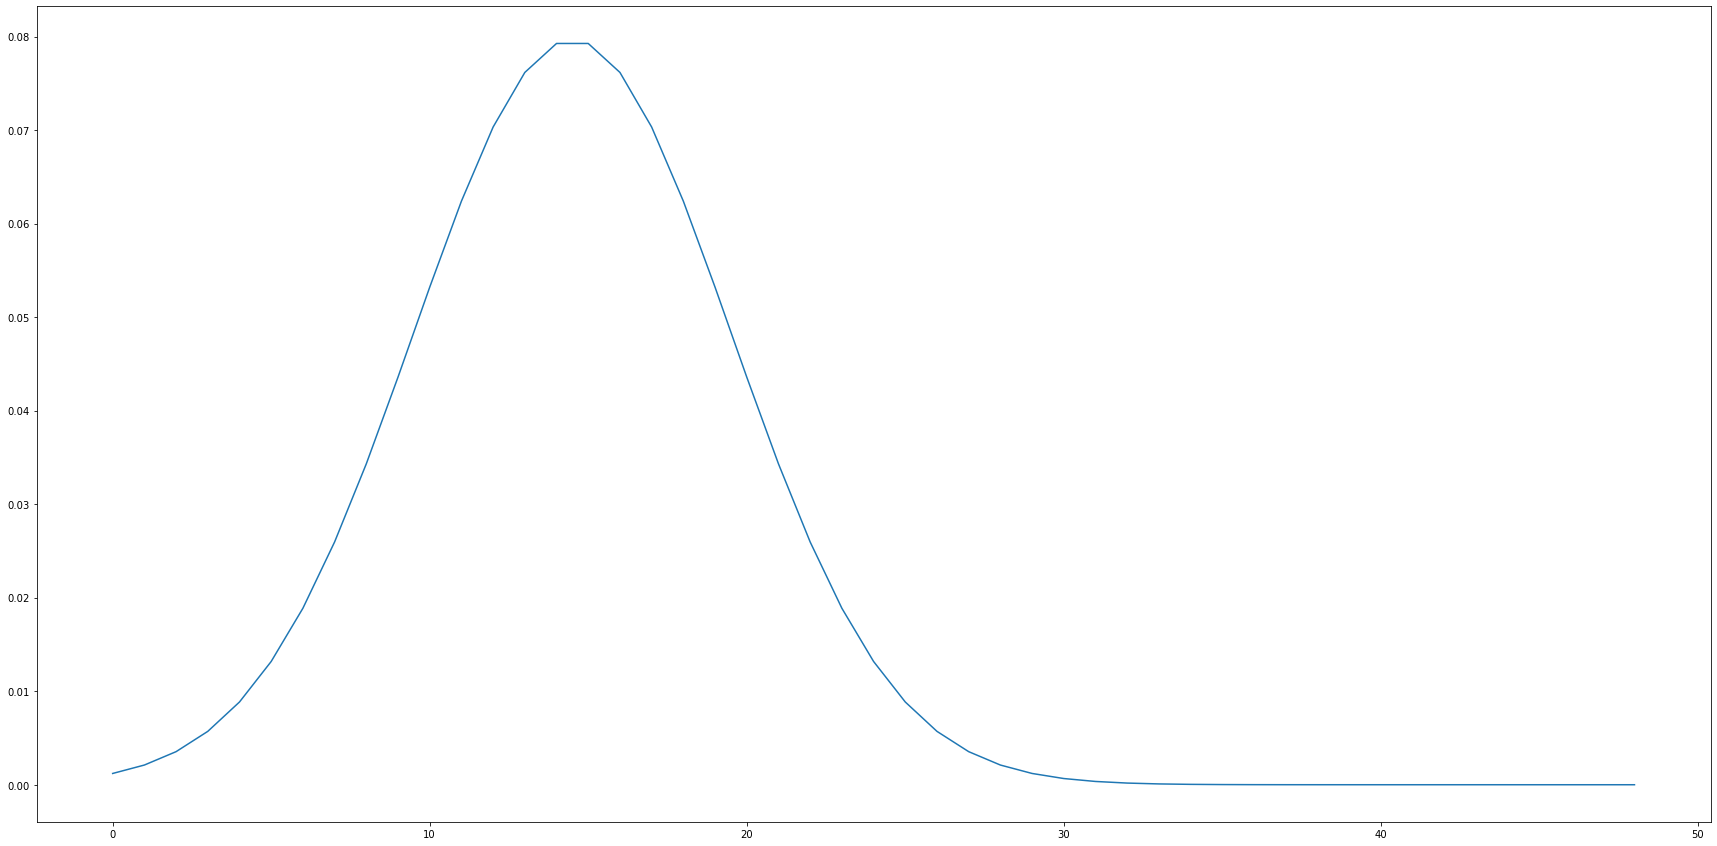

In [21]:
# Probability distribution function
# The function np.diff gives the differencesbetween every (i+1)-th and (i)-th elements of an array 
pdf = np.diff(a)
fig = plt.figure(figsize=(30, 15))
plt.plot(pdf)
plt.show()

In [22]:
print(sum(pdf))
print(pdf[0])

0.998650101963139
0.0012052322987978388


__Remark:__ The sum of all pdf is not equal to one, because we did not take into account the part of the normal distribution when x < 0.

This could be fixed by adding the cdf(0) for the first  year.

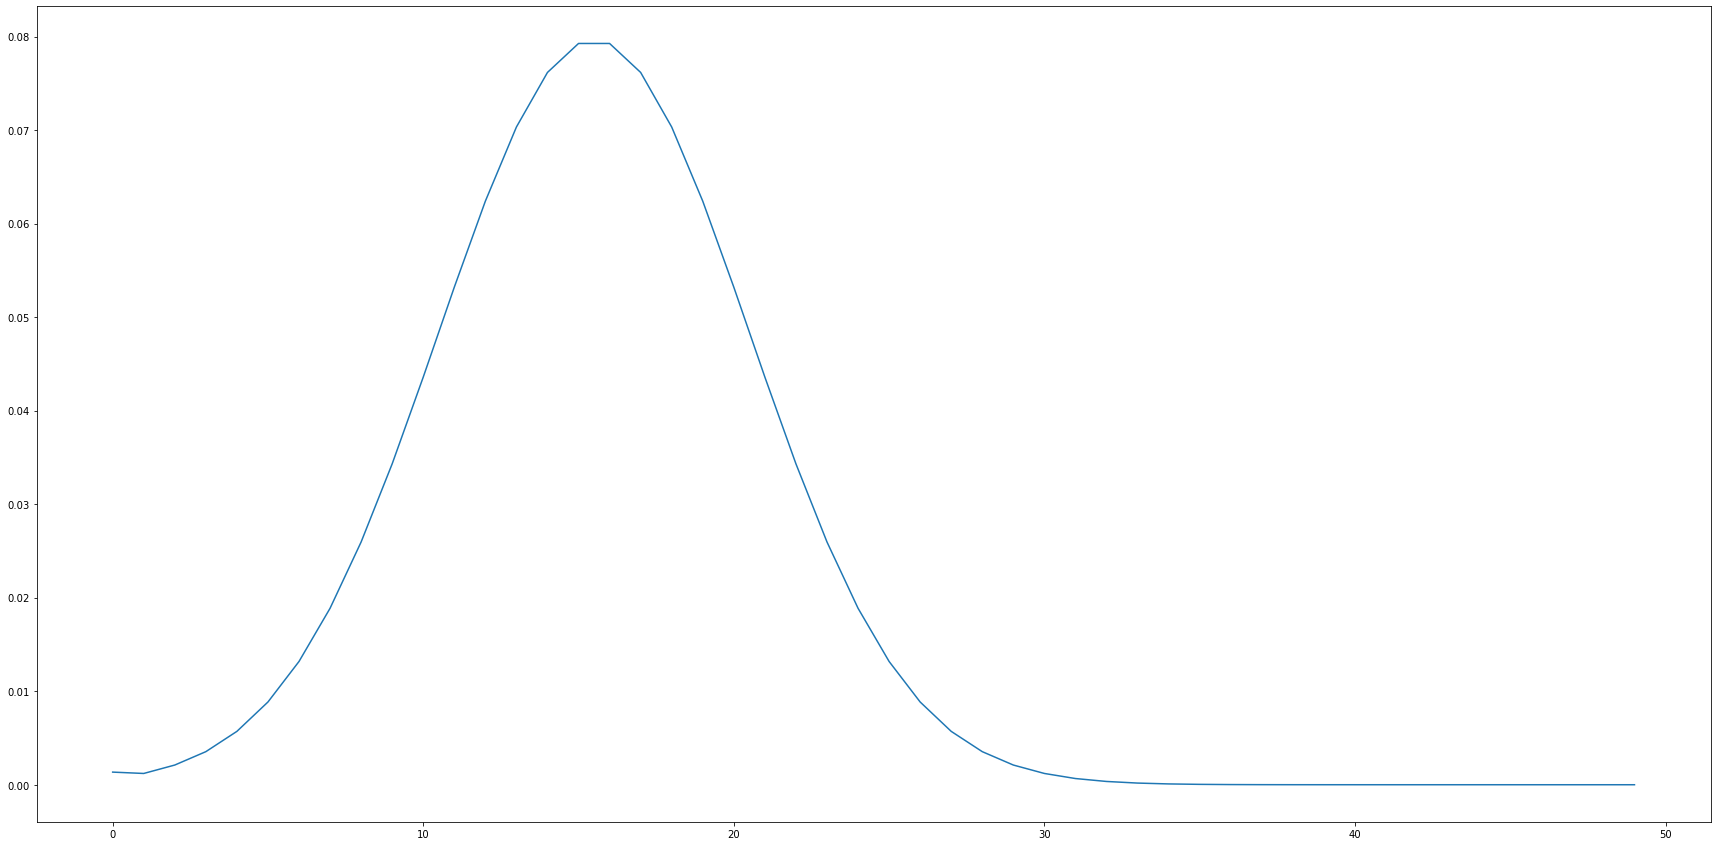

In [23]:
# Probability distribution function
# The function np.diff gives the differencesbetween every (i+1)-th and (i)-th elements of an array 
pdf = np.append(norm(15, 5).cdf(0),  np.diff(a))
fig = plt.figure(figsize=(30, 15))
plt.plot(pdf)
plt.show()

__Question :__
    
Do you think that there should be outflows during the first year of use of a product?

##  Inflow-driven model with a normally distributed lifetime

With a normally distributed lifetime, we need to consider cohorts.

In order to apply the lifetime model one needs to track each cohort in the stock separately. A stock with known subdivision into cohorts can be represented as a time-cohort matrix where each cohort is tracked over time. In the example below, the product lifetime is five years sharp. The time-cohort matrix contains the full information about the stock: the total stock, inflow, and outflow for each year can be derived from it.

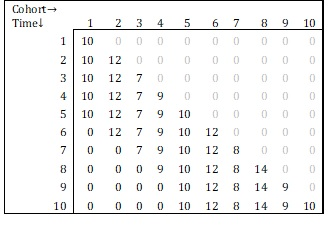

Name the parameters and variables with a subscript, e.g. “_t” or “_tc”, to indicate the dimensions of the matrix. “stock_t” is a vector with the total stock through time and length equal to the number of years (t), while “stock_tc” is a matrix with time (t) as the first dimension and cohort (c) as the second dimension. This makes it easier to keep track of the exact content of a variable and its size.

First, define a function pdf that takes a lifetime, a st_dev and age of cohort as arguments, and returns the probability to exit the stock in this given year:

In [24]:
from scipy.stats import norm
def pdf(lifetime:float, st_dev:float, age:int):
    
    return

Then, define a function outflows_t_c_inflow_driven which returns a 2D array outflows_tc, given inflows, a lifetime and a standard deviation:

In [25]:
def outflows_tc_inflow_driven(inflows_t:list, lifetime:float, st_dev:float):
# Hint: Start by defining an empty array with the desired shape
    return outflows_tc

Define a function that calculates the total outflows vector outflows_t from the array outflows_tc:

In [26]:
def outflows_t_from_outflows_tc(outflows_tc:np.array):
    
    return outflows_t

Define a function stock_tc_from_outflows_tc that calculates the stock_tc array from the inflows_t vector and the outflows_tc array:

In [27]:
def stock_tc_from_outflows_tc (inflows_t:np.array, outflows_tc:np.array):
    
    return stock_tc

Finally, calculate the stock_t and stock_change_t vectors:

In [28]:
# Define lifetime parameters
lifetime = 15
st_dev = 5

# Compute the outflows_tc array

# Calculate outflow_t from outflows_tc:

# Calculate stock_tc from outflows_tc:

# Calculate the total stock by summing the rows of stock_t_c

# To calculate the stock change, we can reuse the function from the previous exercise


In [29]:
# Plot the results


In [30]:
# Check mass balance:
inflows - outflows_t == stock_change_t

NameError: name 'outflows_t' is not defined

In [31]:
# Check stock calculation:
print(max(stock_change_t[1:] - np.diff(stock_t)))

NameError: name 'stock_change_t' is not defined

In [ ]:
# For the first year:
inflows[0] - outflows_t[0] == stock_t[0]    